In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import pandas as pd
import math

import my_lib_santanastasio as my

import rotolamento as rt

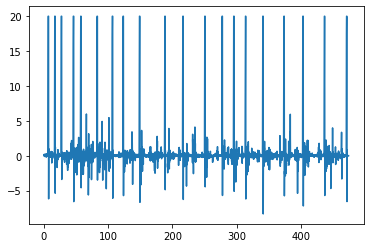

In [2]:
df = pd.read_csv('misure_2/Angolo25/RawData2.csv')

data_time = df['Time (s)'].to_numpy()
data_y = df['Gyroscope y (rad/s)'].to_numpy()

#Plot dataset
plt.plot(data_time[:],data_y[:])

In [3]:
intervals,indexes = rt.get_intervals(data_time,data_y,5,18)
intervals

[[6.224355289, 6.474525777999999],
 [16.44140536, 16.68156928],
 [26.57796168, 26.8181202],
 [45.33051284, 45.5706727],
 [56.75800231, 56.99816687],
 [82.26496809, 82.51513134],
 [106.00072809999999, 106.24088700000001],
 [122.734669, 122.97482859999998],
 [148.291861, 148.5320285],
 [187.70810269999998, 187.9582686],
 [215.7566253, 216.00679359999998],
 [249.9594759, 250.19962999999998],
 [276.8672463, 277.1174126],
 [294.9593008, 295.20947010000003],
 [313.1614997, 313.4216734],
 [340.2595935, 340.509657],
 [373.0914269, 373.33158510000004],
 [402.6211986, 402.8713503],
 [436.04348219999997, 436.2938803],
 [470.62673839999997, 470.87689800000004]]

In [4]:
# Eseguo il fit sul dataset negli intervalli
alpha_values = np.array([rt.m_from_fit(data_time,data_y,x[0],x[1]) for x in intervals ])
alpha_fit = alpha_values[:,0] #array valori attesi
salpha_fit = alpha_values[:,1] #array incertezze

In [5]:
#inferenza prior non vaga
#alpha_best = sum(alpha_fit*(1/salpha_fit**2))/sum(1/salpha_fit**2)
#salpha_best = 1/np.sqrt(sum(1/salpha_fit**2))

#oppure calcolarla con media
alpha_best = alpha_fit.mean()
salpha_best = np.std(alpha_fit,ddof=1)/np.sqrt(len(alpha_fit))

rt.PrintResult("Aplha",alpha_best,salpha_best,2,"[Rad/s]" )

Aplha= 52.97 ± 0.08 [Rad/s] [0.15%]


In [12]:
dtab = pd.DataFrame(data={
    'Alpha' : alpha_fit.round(2),
    'Sigma Alpha' : salpha_fit.round(2),
})

dtab
#print (dtab.to_latex(index=False,formatters={'h': '{:.0E}'.format,'D': '{:.1f}'.format, 'V': '{:0.1E}'.format}))

,Alpha,Sigma Alpha
0,52.88,0.17
1,52.60,0.24
2,53.36,0.15
3,53.43,0.22
4,53.65,0.22
5,53.11,0.16
6,52.91,0.15
7,53.72,0.23
8,53.06,0.20
9,52.82,0.24


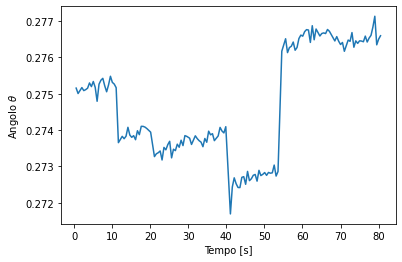

Angolo= 0.275 ± 0.001 [Rad] [0.36%]
Angolo= 15.737 ± 0.038 [Deg] [0.24%]



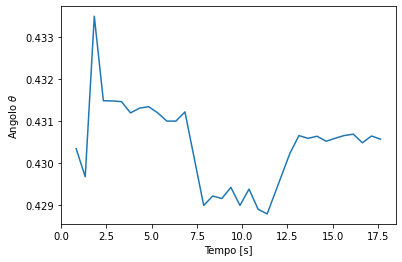

Angolo= 0.43 ± 0.001 [Rad] [0.23%]
Angolo= 24.661 ± 0.035 [Deg] [0.14%]



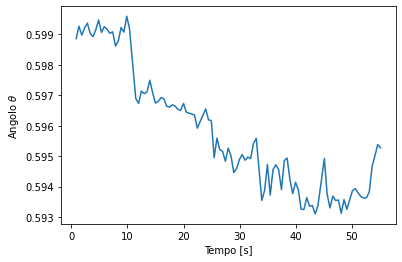

Angolo= 0.596 ± 0.001 [Rad] [0.17%]
Angolo= 34.137 ± 0.051 [Deg] [0.15%]



In [9]:
# Seconda Parte
## Misura Dell'accelerazione di gravità

# analizzo il dataset degli angoli e ne ricavo valore atteso e incertezza
angle_files = [ ['misure_2/Angolo15/plane.csv', 5,'nome1.png'],['misure_2/Angolo25NEW/plane.csv',3,'nome2.png'], ['misure_2/Angolo35/plane.csv',5,'nome3.png'] ]

angles = np.array([ rt.get_angle_from_data(data,nmis,save_fig=True,name=name) for data,nmis,name in angle_files ])

In [ ]:
# analizzo dataset singola misura
# ricavo alpha e incertezza tramite fit

alphas_files = ['misure_2/Angolo15/Raw Data.csv','misure_2/Angolo35/Raw Data.csv']
intervals_2 = [ [20.1,20.55] , [6.6,6.75] ] 

#tramite questa funzione puoi trovare l'intervallo in cui analizzare il dataset
plt = rt.plot_gyro_phyphox(alphas_files[0],intervals_2[0])


In [ ]:
rt.fit_from_gyro_phyphox(alphas_files[0],intervals_2[0])

In [ ]:
plt2 = rt.plot_gyro_phyphox(alphas_files[1],intervals_2[1])

In [ ]:
rt.fit_from_gyro_phyphox(alphas_files[1],intervals_2[1])

# Punto 7 - 2
## fluttuazioni relative nella misura di α per un diverso angolo del piano

In [ ]:
files = [
    pd.read_csv('misure_2/Angolo15/Raw Data1.csv'),
    pd.read_csv('misure_2/Angolo25/RawData2.csv'),#file delle 10 misure
    pd.read_csv('misure_2/Angolo35/Raw Data.csv'),
]

aplha_angle = [] 
aplha_mean = []

for f in files:
    y = f['Gyroscope y (rad/s)'].to_numpy()
    x = f['Time (s)'].to_numpy()
    
    intervals,indexes = rt.get_intervals(x,y,5,18)
    aplha_angle.append(np.array([rt.m_from_fit(x,y,n[0],n[1]) for n in intervals]))

In [ ]:
def plotGyro(x,y,gradi):
    plt.plot(x,y)
    plt.title("Velocità angolare in funzione del tempo \n Angolo {0:d}deg".format(gradi))
    plt.xlabel("Tempo [s]")
    plt.ylabel("$\omega$ [rad/s]")

df = files[0]
y = df['Gyroscope y (rad/s)'].to_numpy()
x = df['Time (s)'].to_numpy()

plotGyro(x,y,15)

In [ ]:
def plotSimpleHist(data,gradi):
    
    binsize = np.std( data, ddof=1 )/2
    t_min = data.min()
    t_max = data.max()
    interval = t_max - t_min
    nbins = int(interval / binsize)

    counts , bins , patches = plt.hist(data, bins=nbins, color="blue", edgecolor="yellow", alpha=0.75)

    plt.xlabel(r'Valore atteso di $\alpha$ ')
    plt.ylabel('Entries')
    plt.title(r'Distribuzione di aplha con $\theta$ = {0:d}deg'.format(gradi))

    
data = np.array(aplha_angle[0][:,0])
plotSimpleHist(data,15)

In [ ]:
for x in aplha_angle:
    val = x[:,0]
    res = [
        val.mean(),
        np.std(val,ddof=1)/np.sqrt(len(val))
    ]
    
    aplha_mean.append(res)
    
print(aplha_mean[0])
print(aplha_mean[1])
print(aplha_mean[2])

# Punto 7 - Studio sulla riproducibilità della misura di α

In [ ]:
root_folder = 'misure_2/Angolo25NEW/'
file_set = [
    #file name - trigger_bottom - trigger_top
    ['data_25deg_no_riposizionamento.csv', 5, 15],
    ['data_25deg_attrito.csv', 5, 15], 
    ['data_25deg_deviazione.csv', 5, 15], 
    ['data_25deg_diversa_altezza.csv', 5, 15], 
    ['data_25deg_diversa_temperatura.csv', 5, 15], 
    
]#tutti i dataset


alpha_7 = []

for file in file_set:
    
    df = pd.read_csv(root_folder+file[0])

    time = df['Time (s)'].to_numpy()
    y = df['Gyroscope y (rad/s)'].to_numpy()

    intervals,indexes = rt.get_intervals(time,y,file[1],file[2])
    
    alpha_m = np.array([rt.m_from_fit(time,y,n[0],n[1]) for n in intervals])
    # (aplha, saplha)
    
    m = alpha_m[:,0].mean()
    sm = np.std(alpha_m[:,0],ddof=1)/np.sqrt(len(intervals))
    
    alpha_7.append([m,sm])
        
alpha_7 = np.array(alpha_7)
salpha_7 = (max(alpha_7[:,0])-min(alpha_7[:,0]))/np.sqrt(12)
                       
print(salpha_7)


# Parte 2: Misura dell’accelerazione di gravità

In [ ]:
aplha_fit = [ rt.fit_from_gyro_phyphox(alphas_files[x],intervals_2[x],plot=False)  for x in range(0,2)]

aplha_angles_dataset = np.array([ 
   # [ angle, sigma-angle, aplha, sigma-aplha]
   [ angles[0][0], angles[0][1], aplha_fit[0][0], aplha_fit[0][1] ],#angolo 15 deg
   [ angles[1][0], angles[1][1], alpha_best, salpha_best ],#angolo 25 deg
   [ angles[2][0], angles[2][1], aplha_fit[1][0], aplha_fit[1][1] ],#angolo 35 deg
])

In [ ]:
x = aplha_angles_dataset[:,0] #angle
sx = aplha_angles_dataset[:,1] #sangle
y = aplha_angles_dataset[:,2] #alpha
sy = aplha_angles_dataset[:,3] #saplha

dtab = pd.DataFrame(data={
    'Angle' : x,
    'Sigma Angle' : sx,
    'Alpha' : y,
    'Sigma Alpha' : 2.2700088598491486,
    'SAplha/Alpha' : [ sy[x]/y[x] for x in range(0,3)]
})

dtab

In [ ]:
rt.easy_linfit(x,sx,y,sy,"aplha-fit.png")

In [ ]:
x = np.sin(x)
sx = np.cos(x)*sx

plt.plot(x,y)
plt.errorbar(x, y, xerr=sx,yerr=sy,ecolor='b', fmt='-o')
plt.plot(x,y,'ro')

plt.grid(linestyle='-', linewidth=1)

plt.xlabel("sin($\dot{\Theta}$) [rad]")
plt.ylabel(r"$\dot{\alpha}$ [rad/s]")
plt.title(r'Grafico di $\alpha$ in funzione di $\Theta$ ')

plt.show()

In [ ]:
res = rt.easy_linfit(x,sx,y,sy)
#rt.easy_linfit(x,sx,y,sy,"nome-immagine.png")

In [ ]:
print(np.array(res))
m = res[0][0]
sm = res[0][1]

# Calcolo della gravità
## Da punto 4 a 6


In [ ]:
# telefono/sensore rettangolare
tel = {
    'I_cm': None,
    'sI_cm':None,
    'm' : 0.150,#kg
    'sm' : 0.025/np.sqrt(12),
    'l_a' : 0.08,#m
    'l_b' : 0.015,#m
    'sl' : 0.001/np.sqrt(12),
}

dev_m = (tel['l_a']**2+tel['l_b']**2)/12
dev_a = tel['l_a']*tel['m']/6
dev_b = tel['l_b']*tel['m']/6

tel['I_cm'] = (tel['m']*(tel['l_a']**2 + tel['l_b']**2))/12
tel['sI_cm'] = np.sqrt( (dev_m*tel['sm'])**2 + (dev_a*tel['sl'])**2 + (dev_b*tel['sl'])**2 )



# cilindro che rotola
rot = {
    'I_cm' : None,
    'sI_cm': None,
    'm' : 0.163,#kg
    'sm' : 0.025/np.sqrt(12),
    'r_ext' : 0.105/2,#m
    'r_int' : 0.08/2,#m
    'sr' : 0.001/np.sqrt(12),
}

dev_m = (rot['r_ext']**2+rot['r_int']**2)/2
dev_a = rot['r_ext']*rot['m']
dev_b = rot['r_int']*rot['m']

rot['I_cm'] = (rot['m']*(rot['r_ext']**2 + rot['r_int']**2))/2
rot['sI_cm'] = np.sqrt( (dev_m*rot['sm'])**2 + (dev_a*rot['sr'])**2 + (dev_b*rot['sr'])**2 )


#tot
Icm_tot = tel['I_cm'] + rot['I_cm']
sIcm_tot = np.sqrt(rot['sI_cm']**2+tel['sI_cm']**2)

rt.PrintResult("Icm: ", Icm_tot,sIcm_tot,5,"[kg*m^2]")

In [ ]:
print(m)
print(sm)

In [ ]:
# gravità


R = rot['r_ext']
sR = rot['sr']
M = rot['m'] + tel['m']
sM = rot['sm']

dev_m = Icm_tot/(M*R) + R
dev_I = m/(M*R)
dev_M = (m*Icm_tot)/(R*M**2)
dev_R = (-m*Icm_tot)/(R*M**2) + m

g = m*(Icm_tot+M*R**2)/(M*R)
sg = np.sqrt( (dev_m*sm)**2 + (dev_I*sIcm_tot)**2 + (dev_M*sM)**2 + (dev_R*sR)**2 )


rt.PrintResult("Gravità: ",g,sg,4,"[N/kg]")

In [ ]:
s = (9.805-g) / sg
s